In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('kc_house_data_train.csv',index_col='Unnamed: 0')
df['date'] = pd.to_datetime(df['date'])
column_names = df.columns
print(column_names)
df

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,2015-03-03,750000.0,5,2.50,3240,9960,1.0,0,1,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,2014-05-20,440000.0,2,1.75,1300,4000,2.0,0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,2014-05-14,310000.0,3,1.00,1050,9876,1.0,0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,2014-12-04,427500.0,3,1.50,1900,43186,1.5,0,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [65]:
#Changes the 33 bedrooms to 3
df.loc[df['bedrooms'] == 33].replace(33,3,inplace=True)

In [ ]:
df['id'].value_counts()

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

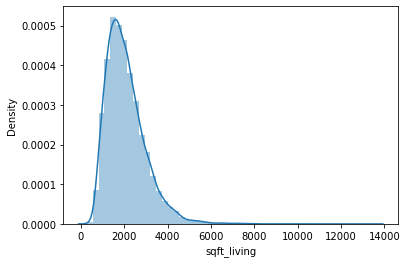

In [4]:
sns.distplot(df['sqft_living'])


In [30]:
df['id'].value_counts()

1232000810    2
3558900590    2
3323059027    2
3935900232    2
3630120700    2
             ..
4312700200    1
7695370160    1
2473420070    1
9842300095    1
1777500160    1
Name: id, Length: 17176, dtype: int64

In [31]:
df['bathrooms'].value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [32]:
df.replace({'bathrooms': {0: 0.25}}, inplace=True)
df.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.25       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [33]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'line'

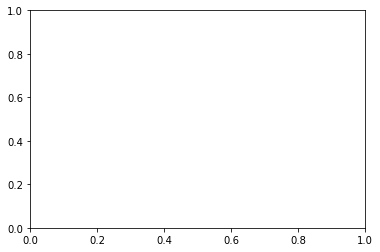

In [68]:
fig,ax = plt.subplots()
ax.box(df['waterfront'],df['price']

In [35]:
df['sqft_yard']= df['sqft_lot']- df['sqft_living']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,6823
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,3830
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,7123
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,10048
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,2015-03-03,750000.0,5,2.50,3240,9960,1.0,0,1,...,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,6720
17286,8819900270,2014-05-20,440000.0,2,1.75,1300,4000,2.0,0,0,...,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2700
17287,3816300095,2014-05-14,310000.0,3,1.00,1050,9876,1.0,0,0,...,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,8826
17288,122069107,2014-12-04,427500.0,3,1.50,1900,43186,1.5,0,0,...,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,41286


In [36]:
price_corr = df.drop(columns=['lat','long','zipcode']).corr()
price_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_yard
id,1.000000,-0.015644,-0.001529,0.003805,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.007494,-0.139605,-0.129968
price,-0.015644,1.000000,0.305106,0.524524,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,0.585567,0.081423,0.071747
bedrooms,-0.001529,0.305106,1.000000,0.507564,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,0.387589,0.026665,0.017027
bathrooms,0.003805,0.524524,0.507564,1.000000,0.755527,0.085509,0.498285,0.065860,0.188941,-0.123146,0.664317,0.687133,0.282711,0.508011,0.048127,0.568320,0.086559,0.069314
sqft_living,-0.014251,0.703540,0.570428,0.755527,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,0.755066,0.179570,0.145557
sqft_lot,-0.129837,0.086803,0.029375,0.085509,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,0.136959,0.701875,0.999769
floors,0.017126,0.256985,0.172975,0.498285,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,0.283933,-0.008170,-0.010007
waterfront,0.000101,0.275779,-0.008581,0.065860,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.091090,0.026895,0.013014
view,0.012594,0.395485,0.079741,0.188941,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.279999,0.073185,0.067125
condition,-0.014272,0.036099,0.025266,-0.123146,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,-0.094307,-0.007125,-0.012419


Text(0.5, 1.0, 'heatmap of price vs other features')

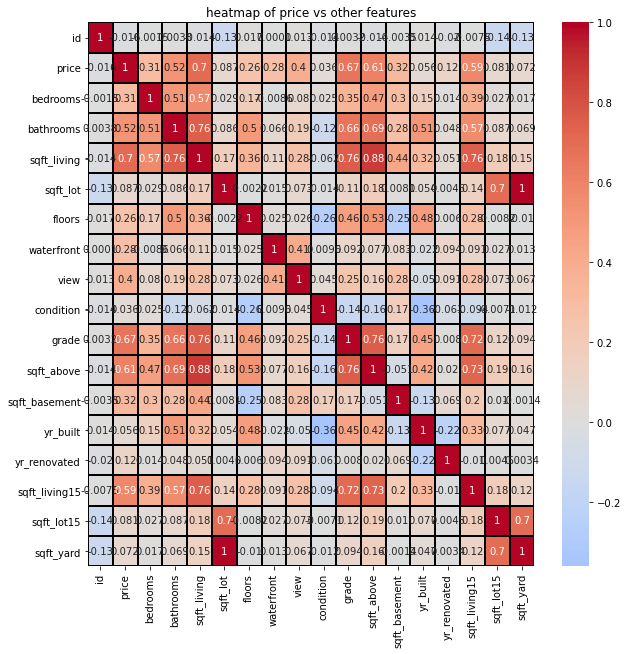

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(price_corr, center=0, annot=True,cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.title('heatmap of price vs other features')

In [38]:
Floor_corr = price_corr.corr()['floors'].map(abs).sort_values(ascending=False)
Floor_corr

floors           1.000000
yr_built         0.805703
sqft_above       0.764825
bathrooms        0.735322
grade            0.716245
condition        0.654746
sqft_living15    0.567627
sqft_living      0.558296
sqft_basement    0.431008
price            0.398621
bedrooms         0.357929
sqft_yard        0.219028
sqft_lot         0.207897
sqft_lot15       0.190239
yr_renovated     0.190171
waterfront       0.148368
view             0.142496
id               0.059566
Name: floors, dtype: float64

<AxesSubplot:>

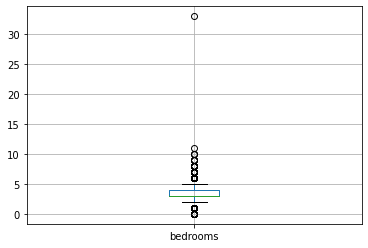

In [64]:
df[['bedrooms']].boxplot()

<BarContainer object of 17290 artists>

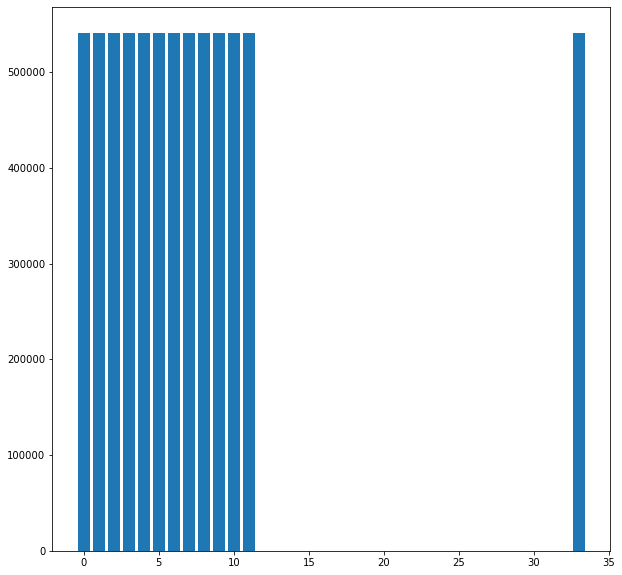

In [6]:
df[df.grade==11].sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6903,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
3903,8106100105,2014-11-14,3850000.0,4,4.25,5770,21300,2.0,1,4,...,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
260,4217402115,2015-04-21,3650000.0,6,4.75,5480,19401,1.5,1,4,...,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
1020,2425049063,2014-09-11,3640900.0,4,3.25,4830,22257,2.0,1,4,...,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582
10286,2525049148,2014-10-07,3418800.0,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,9358400150,2015-02-06,635000.0,5,3.50,4150,13232,2.0,0,0,...,11,4150,0,2006,0,98003,47.3417,-122.182,3840,15121
13984,7937900040,2014-12-19,633000.0,5,2.75,3630,30570,2.0,0,0,...,11,3630,0,2000,0,98058,47.4243,-122.097,3620,41965
2905,1321700030,2014-06-24,575000.0,4,2.50,4620,20793,2.0,0,0,...,11,4620,0,1991,0,98023,47.2929,-122.342,3640,20793
5668,7298040310,2014-05-23,556000.0,5,2.50,3840,16905,2.0,0,0,...,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133


In [40]:
df[df.bathrooms==4.5].sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard
6903,9808700762,2014-06-11,7062500.0,5,4.5,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,27285
7823,9253900271,2015-01-07,3567000.0,5,4.5,4850,10584,2.0,1,4,...,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,5734
5293,7159200005,2014-05-07,3200000.0,7,4.5,6210,8856,2.5,0,2,...,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400,2646
16000,1176001310,2015-03-04,2945000.0,5,4.5,4340,5722,3.0,0,4,...,4340,0,2010,0,98107,47.6715,-122.406,1770,5250,1382
3181,2923500230,2014-12-16,2600000.0,4,4.5,5270,12195,2.0,1,4,...,3400,1870,1979,0,98027,47.5696,-122.090,3390,9905,6925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,3876100320,2014-09-05,482500.0,6,4.5,2940,7500,1.5,0,0,...,2940,0,1966,0,98034,47.7208,-122.182,2010,7500,4560
14681,3450300280,2015-02-25,460000.0,5,4.5,3100,7260,2.0,0,0,...,3100,0,1963,2000,98059,47.5004,-122.162,1650,7700,4160
13472,5409000110,2015-05-06,389000.0,6,4.5,3560,14010,2.0,0,0,...,3560,0,1989,0,98002,47.3244,-122.217,1710,11116,10450
9118,1568100300,2014-09-17,350000.0,6,4.5,3500,8504,2.0,0,0,...,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,5004


In [44]:
df['sale_age'] = df.date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
df.sale_age.value_counts(ascending=False)

 0      418
 9      385
 11     375
 10     372
 8      370
       ... 
 112     22
 115     17
 81      15
 80      12
-1       10
Name: sale_age, Length: 117, dtype: int64

In [48]:
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

0      428
9      385
11     375
10     372
8      370
      ... 
113     23
112     22
115     17
81      15
80      12
Name: sale_age, Length: 116, dtype: int64

<AxesSubplot:xlabel='sale_age'>

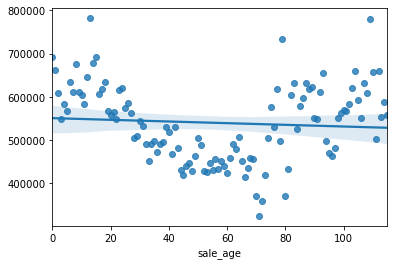

In [47]:
x = df.groupby('sale_age').price.mean().index
y = df.groupby('sale_age').price.mean().values
sns.regplot(x, y)

<AxesSubplot:xlabel='age'>

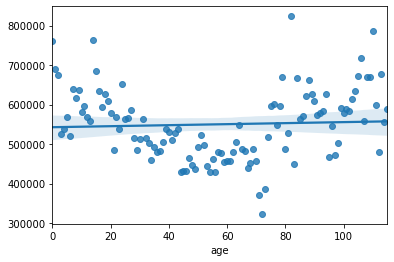

In [11]:
x = df.groupby('age').price.mean().index
y = df.groupby('age').price.mean().values
sns.regplot(x, y)

In [25]:
df_cat = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
df_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]
col_cat = df_cat.columns
col_con = df_con.columns

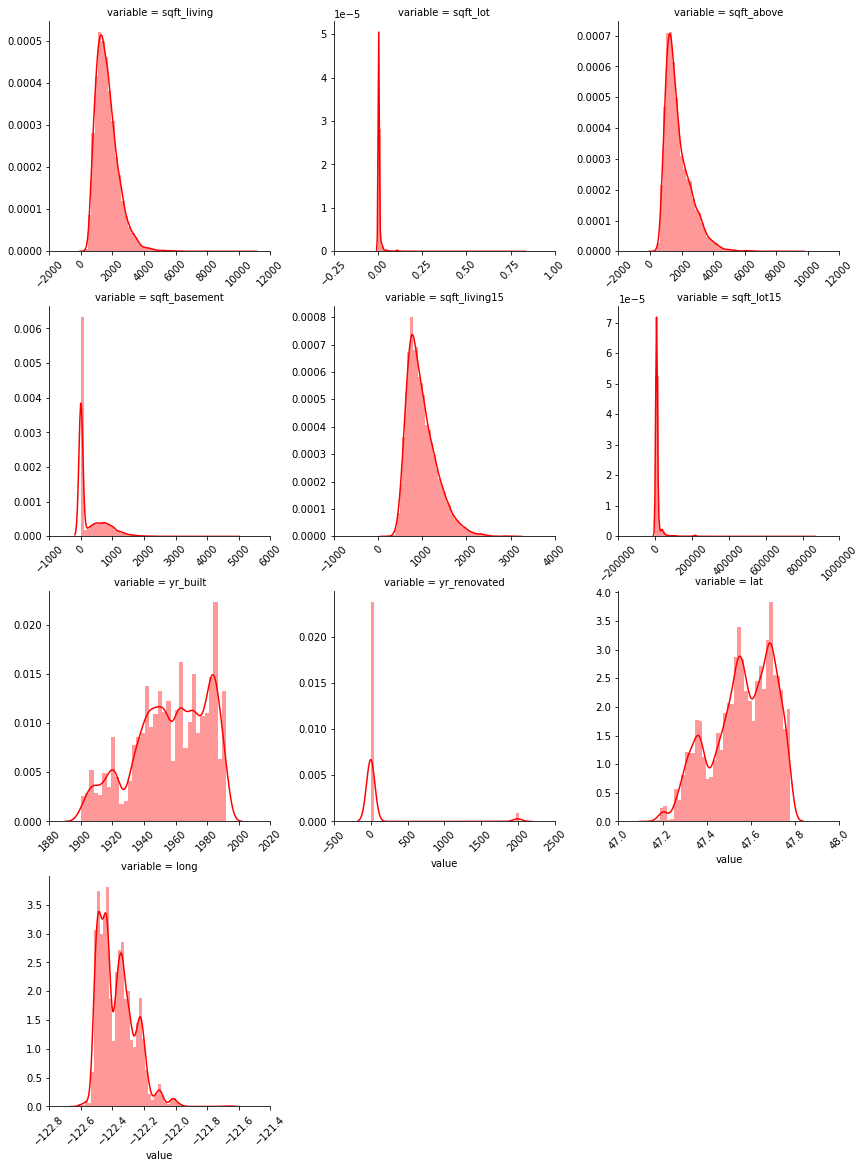

In [26]:
con_1 = pd.melt(df, value_vars = col_con)
g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='r')
g.set_xticklabels(rotation=45)

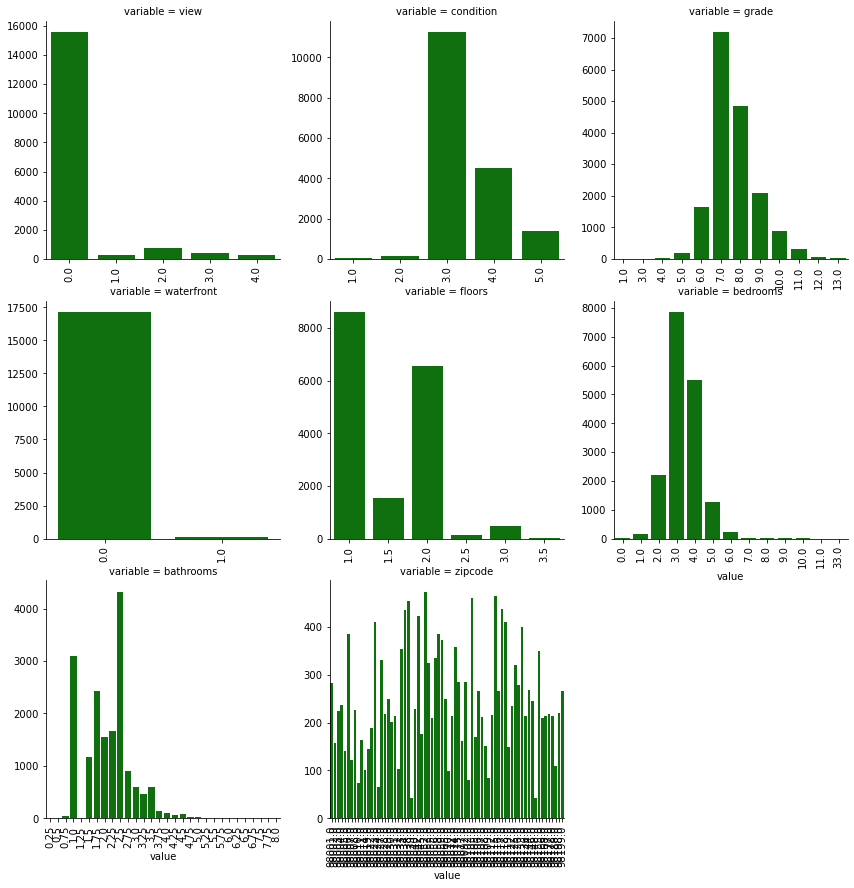

In [27]:
cat_1 = pd.melt(df, value_vars=col_cat)
g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.countplot, 'value', color='g')
g.set_xticklabels(rotation=90)

In [20]:
df.replace({'age': {-1: 0}}, inplace=True)
df.age.value_counts()

1      453
11     360
10     344
9      343
12     337
      ... 
82      27
114     25
113     22
81      19
80      18
Name: age, Length: 116, dtype: int64

# FEATURES

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
pd.get_dummies(df,columns)

In [ ]:
df['has_basement'] = df['sqft_basement'].apply(lambda x:1 if x>0 else 0)
df.drop(['sqft_above','sqft_basement'],inplace=True, axis=1)

In [22]:
df['renovated']=df['yr_renovated'].apply(lambda x:1 if x>0 else 0)

In [ ]:
df['renovated_age'] = 2015- df['yr_renovated']
df['renovated_age'] = df['renovated_age'].apply(lambda x:0 if x>100 else x)

In [13]:
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)

In [ ]:
df['liv/lot'] = df['sqft_living'] / df['sqft_lot']

In [46]:
df['age'] = 2015 - df['yr_built']

In [ ]:
df['decade'] = df['age']//10

In [ ]:
df

In [ ]:
df.waterfront.value_counts()

In [ ]:
df.view.describe()

In [ ]:
df.view.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(df.price)

In [23]:
renovated = df[df.renovated==1]
not_renovated = df[df.renovated==0]
p_value = stats.ttest_ind(renovated.price, not_renovated.price, equal_var=False)[1]
print("P-value for T-Test: ", p_value)

P-value for T-Test:  6.478917377975333e-20


In [6]:
import mapbox
import plotly.express as px